In [56]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from collections import Counter

In [47]:
df=pd.read_csv("chosen.csv")
print(df.shape)
print(list(df.columns))

(27817, 106)
['Unnamed: 0', 'year_born', 'pa_race', 'pa_gender', 'pa_maritalstatus', 'epi_AdmitType', 'epi_weight', 'ceo_HHRG', 'DiagnosisCategory', 'RoughAge', 'M0100_ASSMT_REASON', 'M0110_EPISODE_TIMING', 'M0140_ETHNIC_WHITE', 'M0906_DC_TRAN_DTH_DT', 'M1000_DC_IPPS_14_DA', 'M1000_DC_NONE_14_DA', 'M1028_ACTV_DIAG_DM', 'M1028_ACTV_DIAG_NOA', 'M1028_ACTV_DIAG_PVD_PAD', 'M1030_THH_ENT_NUTRITION', 'M1030_THH_IV_INFUSION', 'M1030_THH_NONE_ABOVE', 'M1030_THH_PAR_NUTRITION', 'M1033_HOSP_RISK_5PLUS_MDCTN', 'M1033_HOSP_RISK_COMPLIANCE', 'M1033_HOSP_RISK_CRNT_EXHSTN', 'M1033_HOSP_RISK_MLTPL_ED_VISIT', 'M1033_HOSP_RISK_MLTPL_HOSPZTN', 'M1033_HOSP_RISK_MNTL_BHV_DCLN', 'M1033_HOSP_RISK_NONE_ABOVE', 'M1033_HOSP_RISK_OTHR_RISK', 'M1033_HOSP_RISK_WEIGHT_LOSS', 'M1051_PVX_RCVD_AGNCY', 'M1056_PVX_RSN_NOT_RCVD_AGNCY', 'M1060_HEIGHT_A', 'M1200_VISION', 'M1242_PAIN_FREQ_ACTVTY_MVMT', 'M1306_UNHLD_STG2_PRSR_ULCR', 'M1307_OLDST_STG2_AT_DSCHRG', 'M1307_OLDST_STG2_ONST_DT', 'M1311_NBR_PRSULC_STG4_C1', 'M1311_

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
df = df.drop(columns=['Unnamed: 0'])

In [58]:
for col in df:
    no_of_unique_values=df[col].nunique()
    if( not col.startswith( 'Unnamed' ) and no_of_unique_values<40):        
        df[col]=pd.Categorical(df[col])
df['M0906_DC_TRAN_DTH_DT'] = pd.to_datetime(df['M0906_DC_TRAN_DTH_DT'])

df["epi_weight"] = pd.to_numeric(df["epi_weight"],errors="coerce")
df["RoughAge"] = pd.to_numeric(df["RoughAge"],errors="coerce")

df['epi_weight'].fillna(int(df['epi_weight'].mean()), inplace=True)
df['RoughAge'].fillna(int(df['RoughAge'].mean()), inplace=True)

df["ceo_HHRG"] = df["ceo_HHRG"].astype("category")

# Printing the number of columns by data type
datatype_list=[]
for col in df:
    datatype_list.append(df[col].dtype.name)
typesCounter = Counter(datatype_list);
typesCounter

df[["epi_weight","RoughAge"]]



,epi_weight,RoughAge
0,178.0,79.0
1,178.0,79.0
2,178.0,79.0
3,178.0,79.0
4,178.0,79.0
...,...,...
27812,178.0,82.0
27813,178.0,82.0
27814,178.0,82.0
27815,178.0,82.0


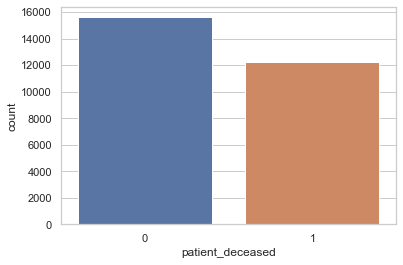

<Figure size 432x288 with 0 Axes>

In [55]:
df["patient_deceased"].value_counts()
sns.countplot(x="patient_deceased", data=df)
plt.show()
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df)
enc.categories_plt.savefig("Response_variable_counts")

In [59]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df)
enc.categories_

xdf = enc.transform(df) # transform using encoder

df2 = pd.DataFrame(xdf, columns=df.columns) # numpy to dataframe

X=df2[df.columns[~df.columns.isin(['patient_deceased'])]]
y=df2["patient_deceased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4221  467]
 [ 777 2881]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      4688
         1.0       0.86      0.79      0.82      3658

    accuracy                           0.85      8346
   macro avg       0.85      0.84      0.85      8346
weighted avg       0.85      0.85      0.85      8346



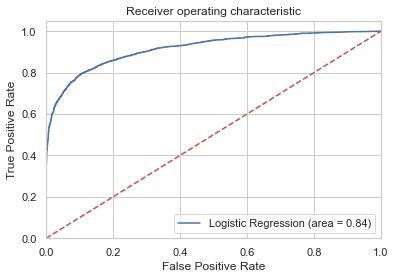

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()